# Data Science - Song Popularity Prediction & Song Recommendation (Group I)

## Statistical Analysis

### Importing Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Reading Dataset

In [2]:
df = pd.read_csv('cleaned_spotify.csv')

### Correlation Coefficients and Plots

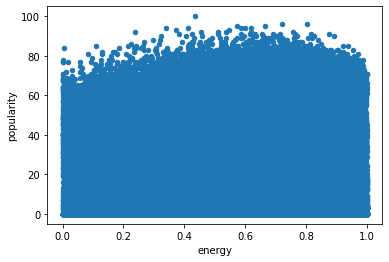

energy (0.34959363557420553, 0.0)
energy SpearmanrResult(correlation=0.3659106517114798, pvalue=0.0)


liveness (-0.08976391640262653, 4.831101268218299e-243)
liveness SpearmanrResult(correlation=-0.12344316571071354, pvalue=0.0)


tempo (0.1022627669110888, 3.5739355e-315)
tempo SpearmanrResult(correlation=0.10310227041553424, pvalue=0.0)


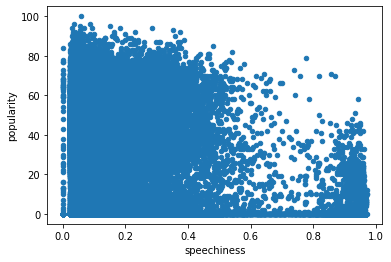

speechiness (-0.22331039532521874, 0.0)
speechiness SpearmanrResult(correlation=-0.19539625335605848, pvalue=0.0)


loudness (0.35678990346494266, 0.0)
loudness SpearmanrResult(correlation=0.3807479207960372, pvalue=0.0)


key (0.0010897571680228823, 0.6866738710570897)
key SpearmanrResult(correlation=0.0014367513776887956, pvalue=0.5948556684674834)


mode (0.0022366056031722197, 0.40773901714326455)
mode SpearmanrResult(correlation=0.007372167078065612, pvalue=0.006355762599225088)


year (0.5585824105337462, 0.0)
year SpearmanrResult(correlation=0.5560364459778695, pvalue=0.0)


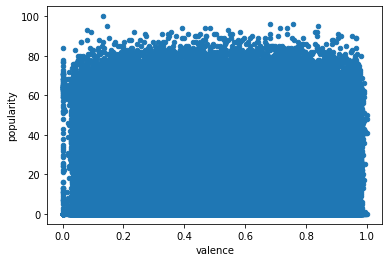

valence (0.052286328541696174, 1.4656630940999439e-83)
valence SpearmanrResult(correlation=0.052272250130223304, pvalue=1.6220542164868295e-83)


instrumentalness (-0.291309853524475, 0.0)
instrumentalness SpearmanrResult(correlation=-0.2773890163390314, pvalue=0.0)


duration_ms (0.030480024844638166, 1.5602902278352723e-29)
duration_ms SpearmanrResult(correlation=0.2025057199643507, pvalue=0.0)


acousticness (-0.415653769196235, 0.0)
acousticness SpearmanrResult(correlation=-0.4182629162639103, pvalue=0.0)


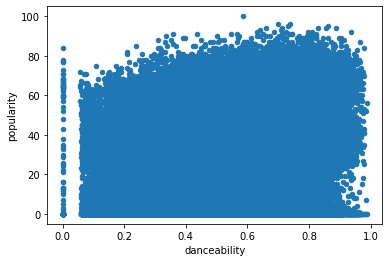

danceability (0.12696151012956786, 0.0)
danceability SpearmanrResult(correlation=0.10330133877137972, pvalue=0.0)


In [3]:
### Review whether filtering to songs newer than 1980 provide more interesting results (RETIRED)
## Filter out all years less than 1980
# df.drop(df.index[df['year'] < 1980], inplace=True)

## Plot all data against popularity and calculate pearson and spearman coefficients
l = ["energy", "liveness", "tempo", "speechiness", "loudness", "key", "mode", "year", "valence", "instrumentalness", "duration_ms", "acousticness", "danceability"]
for i in range(len(l)):
        df.plot.scatter(x=l[i], y='popularity')
        plt.show()
        print(l[i], stats.pearsonr(df[l[i]], df['popularity']))
        print(l[i], stats.spearmanr(df[l[i]], df['popularity']))

energy (0.7805997418563599, 2.636410381971405e-21)
energy SpearmanrResult(correlation=0.776766189137323, pvalue=5.4859070289562586e-21)


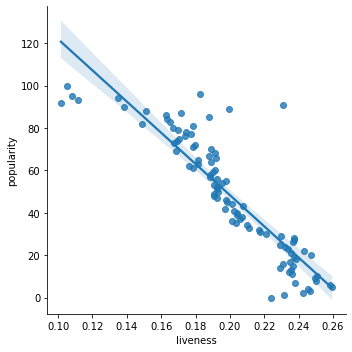

liveness (-0.8917057074812252, 8.097598950847149e-35)
liveness SpearmanrResult(correlation=-0.9177807955422093, pvalue=2.7490085914052344e-40)


tempo (0.3321743385262504, 0.000833024365751402)
tempo SpearmanrResult(correlation=0.5127288028613507, pvalue=6.755476532144912e-08)


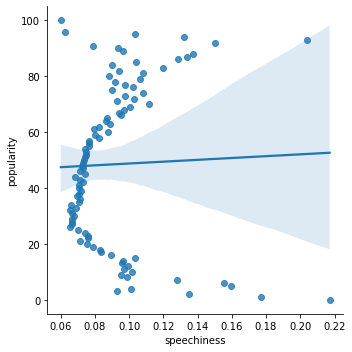

speechiness (0.03304741976356628, 0.7466623289334892)
speechiness SpearmanrResult(correlation=0.1577887012349457, pvalue=0.12072816597619343)


loudness (0.960051958379823, 6.724048022954659e-55)
loudness SpearmanrResult(correlation=0.9601400072681368, pvalue=6.060813369734172e-55)


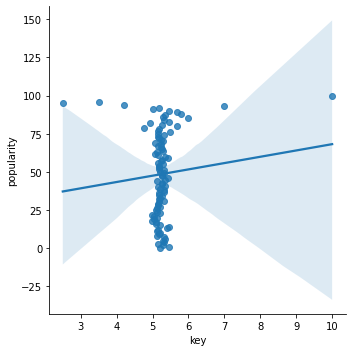

key (0.09322323715727346, 0.36123602671850924)
key SpearmanrResult(correlation=0.1266381253253995, pvalue=0.21402340961900934)


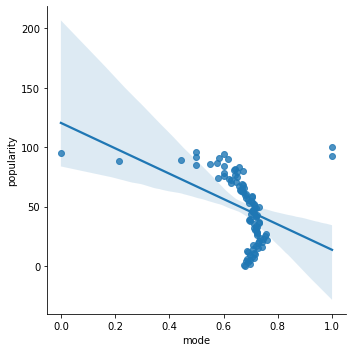

mode (-0.41930271109418943, 1.7280948020796882e-05)
mode SpearmanrResult(correlation=-0.6306121929669397, pvalue=3.4310799924087724e-12)


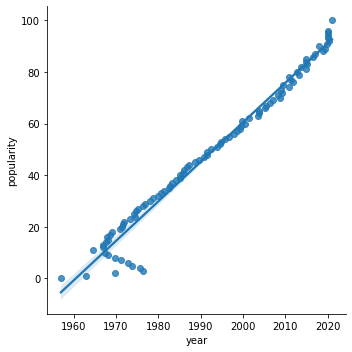

year (0.9863830868348621, 4.553079584809341e-77)
year SpearmanrResult(correlation=0.9845515294079837, pvalue=1.8646304339159484e-74)


valence (-0.20410104662138356, 0.04381609361004196)
valence SpearmanrResult(correlation=-0.15712564313447963, pvalue=0.12231690442039311)


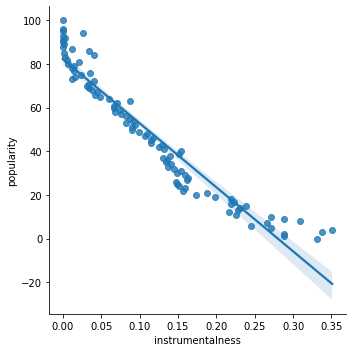

instrumentalness (-0.961674227259293, 9.548621546599352e-56)
instrumentalness SpearmanrResult(correlation=-0.9868025935772621, pvalue=1.0237709875325077e-77)


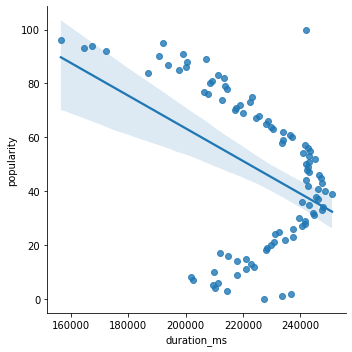

duration_ms (-0.43002481740071935, 9.908622694424922e-06)
duration_ms SpearmanrResult(correlation=-0.3416470618237923, pvalue=0.0005754096607789602)


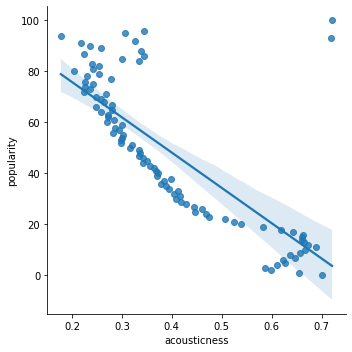

acousticness (-0.7530001074277654, 3.806574690713933e-19)
acousticness SpearmanrResult(correlation=-0.7880636790798793, pvalue=6.06303214224104e-22)


danceability (0.9054143542489627, 1.702005984636988e-37)
danceability SpearmanrResult(correlation=0.9508061893923454, pvalue=1.183293815991194e-50)


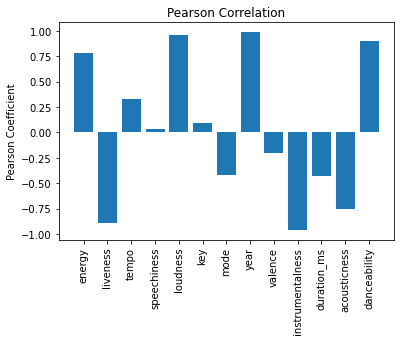

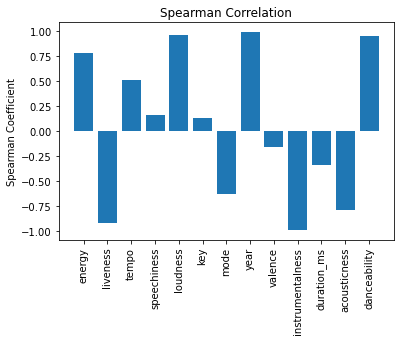

In [4]:
## Determine coefficients based on average attribute over popularity
df1 = df.groupby('popularity')
df1 = df1.mean()
df1 = df1.reset_index()
p = []
s =[]

l = ["energy", "liveness", "tempo", "speechiness", "loudness", "key", "mode", "year", "valence", "instrumentalness", "duration_ms", "acousticness", "danceability"]
for i in range(len(l)):
        # df1.plot.scatter(x=l[i], y='popularity')
        sns.lmplot(x=l[i],y="popularity", data=df1, palette="Paired")
        # sns.lmplot(x=l[i],y="popularity", data=df1, palette="Paired", order=2)
        plt.show()
        p1 = stats.pearsonr(df1[l[i]], df1['popularity'])
        print(l[i],p1)
        p.append(p1[0])
        s1 = stats.spearmanr(df1[l[i]], df1['popularity'])
        print(l[i], s1)
        s.append(s1[0])

## Summary Plots
plt.bar(l, p)
plt.title('Pearson Correlation')
plt.xticks(rotation = 90)
plt.ylabel('Pearson Coefficient')
plt.show()

plt.bar(l, s)
plt.title('Spearman Correlation')
plt.xticks(rotation = 90)
plt.ylabel('Spearman Coefficient')
plt.show()

## Machine Learning

### Classification

#### Importing Packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay

#### Start with fresh dataframe(s)

In [6]:
# df2 = pd.read_csv('cleaned_spotify.csv')
df3 = pd.read_csv('cleaned_spotify.csv')

#### Establish training and testing sets

In [7]:
%%capture --no-stdout
# Suppress unnecessary pandas warning

print("number of samples: " + str(len(df3)))

## Sampling features
# X1 = df3[['loudness', 'energy', 'instrumentalness', 'acousticness', 'liveness', 'duration_ms', 'speechiness', 'valence', 'danceability', 'tempo']]
# X2 = df3[['loudness', 'energy', 'instrumentalness', 'acousticness', 'liveness', 'duration_ms', 'speechiness', 'valence', 'danceability', 'tempo', 'explicit', 'key', 'mode', 'year']]
X3 = df3[['loudness', 'energy', 'instrumentalness', 'acousticness', 'liveness', 'duration_ms', 'speechiness', 'valence', 'danceability', 'tempo', 'explicit', 'key', 'mode']]
y = df3['popularity']
mean = y.mean()
print("the mean is: " + str(mean))

## Feature Engineering for Changing Year to Age
max_year = max(df3['year'])
age = []
for i in range(len(df3['year'])):
    age.append(max_year - df3['year'][i])
X3['age'] = age

## Training/Testing Split
X_train, X_test, y_train, y_test = train_test_split(X3,y,test_size=0.2)

## Classify data
y_bool_train = [i > mean for i in y_train]
for i in range(len(y_bool_train)):
    if y_bool_train[i]:
        y_bool_train[i] = 1
    else:
        y_bool_train[i] = 0

y_bool_test = [i > mean for i in y_test]
for i in range(len(y_bool_test)):
    if y_bool_test[i]:
        y_bool_test[i] = 1
    else:
        y_bool_test[i] = 0

print("number of popular samples: " + str(sum(y_bool_test) + sum(y_bool_train)))

number of samples: 137013
the mean is: 26.195623772926655
number of popular samples: 67775


#### Assessing Classification Models

In [8]:
## Model 1: Logistic Regression
print('Logistic Regression')
model1 = LogisticRegression(solver='liblinear')
lrscores = cross_val_score(model1, X_train, y_bool_train, scoring='f1', cv=5)
print(lrscores)
print('avg cv score: ' + str(sum(lrscores)/len(lrscores)))
model1.fit(X_train, y_bool_train)
pred = model1.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))

## Model 2: Decision Tree Classifier
print()
print('Decision Tree Classifier')
model2 = tree.DecisionTreeClassifier()
dtscores = cross_val_score(model2, X_train, y_bool_train, scoring='f1', cv=5)
print(dtscores)
print('avg cv score: ' + str(sum(dtscores)/len(dtscores)))
model2.fit(X_train, y_bool_train)
pred = model2.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))

## Model 3: kNN Classifier
print()
print('K Nearest Neighbor Classifier')
model3 = KNeighborsClassifier()
knnscores = cross_val_score(model3, X_train, y_bool_train, scoring='f1', cv=5)
print(knnscores)
print('avg cv score: ' + str(sum(knnscores)/len(knnscores)))
model3.fit(X_train, y_bool_train)
pred = model3.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))

## Model 4: Voting Classifier with Decision Tree
print()
print('Voting Classifier with Decision Tree')
classifier = tree.DecisionTreeClassifier()
v = []
for i in range(11):
    v.append(('DTC'+str(i), classifier))
model4 = VotingClassifier(estimators=v, voting ='hard')
vcscores = cross_val_score(model4, X_train, y_bool_train, scoring='f1', cv=5)
print(vcscores)
print('avg cv score: ' + str(sum(vcscores)/len(vcscores)))
model4.fit(X_train, y_bool_train)
pred = model4.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))

## Model 5: Bagging Classifier with Decision Tree
print()
print('Bagging Classifier with Decision Tree')
classifier = tree.DecisionTreeClassifier()
model5 = BaggingClassifier(base_estimator=classifier)
bcscores = cross_val_score(model5, X_train, y_bool_train, scoring='f1', cv=5)
print(bcscores)
print('avg cv score: ' + str(sum(bcscores)/len(bcscores)))
model5.fit(X_train, y_bool_train)
pred = model5.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))

## Model 6: Voting Classifier with Decision Tree and kNN
print()
print('Voting Classifier with Decision Tree and KNN')
classifier = tree.DecisionTreeClassifier()
v = []
for i in range(5):
    v.append(('DTC'+str(i), classifier))
classifier = KNeighborsClassifier()
v = []
for i in range(5):
    v.append(('KNN'+str(i), classifier))
model6 = VotingClassifier(estimators=v, voting ='hard')
vc2scores = cross_val_score(model6, X_train, y_bool_train, scoring='f1', cv=5)
print(vc2scores)
print('avg cv score: ' + str(sum(vc2scores)/len(vc2scores)))
model6.fit(X_train, y_bool_train)
pred = model6.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))

## Model 7: Random Forest Classifier
print()
print('Random Forest Classifier')
model7 = RandomForestClassifier()
rfcscores = cross_val_score(model7, X_train, y_bool_train, scoring='f1', cv=5)
print(rfcscores)
print('avg cv score: ' + str(sum(rfcscores)/len(rfcscores)))
model7.fit(X_train, y_bool_train)
pred = model7.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))

## Model 8: Extra Classifier
print()
print('Extra Tree Classifier')
model8 = ExtraTreesClassifier()
etcscores = cross_val_score(model8, X_train, y_bool_train, scoring='f1', cv=5)
print(etcscores)
print('avg cv score: ' + str(sum(etcscores)/len(etcscores)))
model8.fit(X_train, y_bool_train)
pred = model8.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))

## Model 9: AdaBoosting Classifier
print()
print('Ada Boosting Classifier')
model9 = AdaBoostClassifier()
abcscores = cross_val_score(model9, X_train, y_bool_train, scoring='f1', cv=5)
print(abcscores)
print('avg cv score: ' + str(sum(abcscores)/len(abcscores)))
model9.fit(X_train, y_bool_train)
pred = model9.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))

## Model 10: Gradient Boosting Classifier
print()
print('Gradient Boosting Classifier')
model10 = GradientBoostingClassifier()
gbcscores = cross_val_score(model10, X_train, y_bool_train, scoring='f1', cv=5)
print(gbcscores)
print('avg cv score: ' + str(sum(gbcscores)/len(gbcscores)))
model10.fit(X_train, y_bool_train)
pred = model10.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))

## Model 11: Histogram Gradient Boosting classifier
print()
print('Histogram Gradient Boosting Classifier')
model11 = HistGradientBoostingClassifier()
hgbcscores = cross_val_score(model11, X_train, y_bool_train, scoring='f1', cv=5)
print(hgbcscores)
print('avg cv score: ' + str(sum(hgbcscores)/len(hgbcscores)))
model11.fit(X_train, y_bool_train)
pred = model11.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))

Logistic Regression
[0.72055149 0.72284938 0.72821835 0.72528587 0.72624769]
avg cv score: 0.7246305555473758
score on test data: 0.7234420705742955

Decision Tree Classifier
[0.80450264 0.80605837 0.80324826 0.80258481 0.80828299]
avg cv score: 0.8049354139602405
score on test data: 0.8076766329517248

K Nearest Neighbor Classifier
[0.73179474 0.73858378 0.73565119 0.73005168 0.73390333]
avg cv score: 0.733996942933412
score on test data: 0.7406940945983768

Voting Classifier with Decision Tree
[0.80692226 0.80894628 0.8060241  0.80668699 0.80963144]
avg cv score: 0.8076422124077206
score on test data: 0.8092438528378627

Bagging Classifier with Decision Tree
[0.84666759 0.85149061 0.84972325 0.84692233 0.85036832]
avg cv score: 0.8490344214181622
score on test data: 0.8498260676485827

Voting Classifier with Decision Tree and KNN
[0.73179474 0.73858378 0.73565119 0.73005168 0.73390333]
avg cv score: 0.733996942933412
score on test data: 0.7406940945983768

Random Forest Classifier
[0

#### Parameter Tuning for Random Forest Classifier

In [9]:
param_grid = {'criterion' : ['gini', 'entropy', 'log_loss'], 'max_features' : ['sqrt', 'log2'], 'warm_start': [True, False], 'max_depth' : [50, 100, 150, 200]}
estimator = RandomForestClassifier()
gs = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='f1')
result = gs.fit(X_train, y_bool_train)
print("Best: %f using %s" % (result.best_score_, result.best_params_))

## Concluded, these parameters only provide marginal gain, use defaults

Best: 0.873398 using {'criterion': 'gini', 'max_depth': 50, 'max_features': 'log2', 'warm_start': True}


#### Assessing Ensemble Methods

In [10]:
## Voting Classifier with Random Forest
print('Voting Classifier with Random Forest')
classifier = RandomForestClassifier()
v = []
for i in range(11):
    v.append(('RFC'+str(i), classifier))
model12 = VotingClassifier(estimators=v, voting ='soft')
vc3scores = cross_val_score(model12, X_train, y_bool_train, scoring='f1', cv=5)
print(vc3scores)
print('avg cv score: ' + str(sum(vc3scores)/len(vc3scores)))
model12.fit(X_train, y_bool_train)
pred = model12.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))

## Bagging Classifier with Random Forest
print()
print('Bagging Classifier with Random Forest')
classifier = RandomForestClassifier()
model13 = BaggingClassifier(base_estimator=classifier)
bc2scores = cross_val_score(model13, X_train, y_bool_train, scoring='f1', cv=5)
print(bc2scores)
print('avg cv score: ' + str(sum(bc2scores)/len(bc2scores)))
model13.fit(X_train, y_bool_train)
pred = model13.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))

Voting Classifier with Random Forest
[0.87180164 0.87721614 0.87243272 0.87389977 0.87451602]
avg cv score: 0.8739732562932705
score on test data: 0.8720872583044124

Bagging Classifier with Random Forest
[0.87045994 0.87720068 0.87204168 0.87333274 0.87219366]
avg cv score: 0.8730457434605302
score on test data: 0.8714033227288794


#### Reviewing ROC-AUC Curve and Precision-Recall Curve

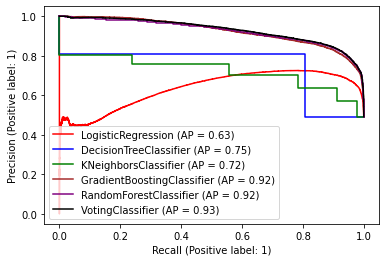

In [11]:
m1_disp = RocCurveDisplay.from_estimator(model1, X_test, y_bool_test, color='red')
ax = plt.gca()
m2_disp = RocCurveDisplay.from_estimator(model2, X_test, y_bool_test, color='blue', ax=ax)
m3_disp = RocCurveDisplay.from_estimator(model3, X_test, y_bool_test, color='green', ax=ax)
m4_disp = RocCurveDisplay.from_estimator(model10, X_test, y_bool_test, color='brown', ax=ax)
m5_disp = RocCurveDisplay.from_estimator(model7, X_test, y_bool_test, color='purple', ax=ax)
m6_disp = RocCurveDisplay.from_estimator(model12, X_test, y_bool_test, color='black', ax=ax)

m1_disp = PrecisionRecallDisplay.from_estimator(model1, X_test, y_bool_test, color='red')
ax = plt.gca()
m2_disp = PrecisionRecallDisplay.from_estimator(model2, X_test, y_bool_test, color='blue', ax=ax)
m3_disp = PrecisionRecallDisplay.from_estimator(model3, X_test, y_bool_test, color='green', ax=ax)
m4_disp = PrecisionRecallDisplay.from_estimator(model10, X_test, y_bool_test, color='brown', ax=ax)
m5_disp = PrecisionRecallDisplay.from_estimator(model7, X_test, y_bool_test, color='purple', ax=ax)
m6_disp = PrecisionRecallDisplay.from_estimator(model12, X_test, y_bool_test, color='black', ax=ax)

### Regression

#### Importing Packages

In [12]:
import pandas as pd
from statistics import mean
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn import neighbors
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

#### Start with fresh dataframe(s)

In [13]:
df = pd.read_csv('cleaned_spotify.csv')

#### Establish training and testing sets

In [14]:
%%capture --no-stdout
# Suppress unnecessary pandas warning

X = df[['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']]
y = df['popularity']

## Feature Engineering for Changing Year to Age
max_year = max(df['year'])
X['age'] = abs(max_year - df['year'])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#### Assessing Regression Models

In [15]:
## Model 1: Linear Regression
print('Linear Regression')
linear_regression_model = LinearRegression()
lr_scores = cross_val_score(linear_regression_model, X_train, y_train, cv=5, scoring='r2')
print(lr_scores)
print('avg cv score: ', mean(lr_scores))
# Linear Regression
# [0.40482407 0.41161445 0.40603056 0.40546286 0.41217253]
# avg cv score:  0.4080208958301596

## Model 2: Support Vector Regression
print()
print('Support Vector Regression')
svm = svm.SVR()
sv_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='r2')
print(sv_scores)
print('avg cv score: ', mean(sv_scores))
# Support Vector Regression
# [0.0767706  0.07914685 0.07777545 0.07724948 0.07266257]
# avg cv score:  0.07672099037137044

## Model 3: Nearest Neighbors Regression
print()
print('Nearest Neighbors Regression')
knr = neighbors.KNeighborsRegressor()
knr_scores = cross_val_score(knr, X_train, y_train, cv=5, scoring='r2')
print(knr_scores)
print('avg cv score: ', mean(knr_scores))
# Nearest Neighbors Regression
# [0.27771797 0.27675422 0.28411321 0.27036806 0.27996391]
# avg cv score:  0.277783474854868

## Model 4: Decision Tree Regression
print()
print('Decision Tree Regression')
clf = tree.DecisionTreeRegressor()
clf_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='r2')
print(clf_scores)
print('avg cv score: ', mean(clf_scores))
# Decision Tree Regression
# [0.3542     0.35530328 0.32938688 0.35318616 0.33816968]
# avg cv score:  0.34604920139355017

## Model 5: Random Forest Regression
print()
print('Random Forest Regressor')
rfr = RandomForestRegressor()
rfr_scores = cross_val_score(rfr, X_train, y_train, cv=5, scoring='r2')
print(rfr_scores)
print('avg cv score: ', mean(rfr_scores))
# Random Forest Regressor
# [0.68140303 0.67684171 0.67704753 0.67795496 0.67941476]
# avg cv score:  0.6785323969124057

## Model 6: Gradient Boosting Regression
print()
print('Gradient Boosting Regression')
gradient_boosting_reg = GradientBoostingRegressor()
# gradient_boosting_reg = GradientBoostingRegressor(learning_rate=0.05, max_depth=9)
gb_scores = cross_val_score(gradient_boosting_reg, X_train, y_train, cv=5, scoring='r2')
print(gb_scores)
print('avg cv score: ', mean(gb_scores))
# Gradient Boosting Regression
# [0.64190915 0.63607062 0.63602055 0.63823954 0.6386349 ]
# avg cv score:  0.6381749532263363

Linear Regression
[0.40680069 0.41482103 0.39742641 0.41615715 0.40768707]
avg cv score:  0.40857846796276354

Support Vector Regression
[0.06924801 0.08254114 0.07108193 0.07954646 0.07739827]
avg cv score:  0.07596316073559688

Nearest Neighbors Regression
[0.27554046 0.29175344 0.27548329 0.28485731 0.28556056]
avg cv score:  0.2826390126620714

Decision Tree Regression
[0.34678489 0.3364112  0.32779972 0.35106106 0.34505599]
avg cv score:  0.34142257284527905

Random Forest Regressor
[0.68398312 0.68581821 0.67704571 0.68545654 0.67611256]
avg cv score:  0.6816832302550526

Gradient Boosting Regression
[0.63929895 0.64132366 0.63198071 0.64376576 0.63210011]
avg cv score:  0.6376938351899593


In [16]:
## Model 7: AdaBoost Regression
print()
print('AdaBoostRegressor')
ada = AdaBoostRegressor(base_estimator=GradientBoostingRegressor())
ada_scores = cross_val_score(ada, X_train, y_train, cv=3, scoring='r2',verbose=1)
print(ada_scores)
print('avg cv score: ', mean(ada_scores))


AdaBoostRegressor


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0.6082069  0.62474721 0.63078822]
avg cv score:  0.621247441571029


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 12.8min finished


#### Parameter Tuning for RFR and GBR

The parameter tuning was completed over multiple iterations due to runtime. The results of previous iterations are included as comment in each section and therefore not included in recent outputs.

##### Random Forest Regressor

In [17]:
## Random Forest Regressor
param_dict_rfr = {
    "n_estimators" : [100],
    "max_depth" : [None],
    "min_samples_split" : range(2,10,2),
}

grid_rfr = GridSearchCV(rfr,
                    param_grid=param_dict_rfr,
                    cv=5,
                    scoring='r2',
                    verbose=1)

grid_rfr.fit(X_train, y_train)

print("Best Parameter Score: ")
print(grid_rfr.best_score_)
print("Best Parameters: ")
print(grid_rfr.best_params_)

data_rfr = grid_rfr.cv_results_
data_rfr

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameter Score: 
0.682215186691889
Best Parameters: 
{'max_depth': None, 'min_samples_split': 4, 'n_estimators': 100}


{'mean_fit_time': array([89.04695077, 87.74669738, 85.59966931, 83.81210561]),
 'std_fit_time': array([0.26782316, 1.31326949, 1.1611788 , 0.22875915]),
 'mean_score_time': array([0.60006814, 0.54378352, 0.46878338, 0.45003128]),
 'std_score_time': array([0.00768946, 0.03479608, 0.0001332 , 0.00624495]),
 'param_max_depth': masked_array(data=[None, None, None, None],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 4, 6, 8],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 100, 100, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100},
  {'max_depth': None, 'min_samples_split': 4, 'n_estimators': 100},
  {'max_depth': None, 'min_samples_split': 6, 'n_estimator

##### Saved runs for Random Forest tuning

In [18]:
## Previous Runs:
# Default
# 0.678

## Run 1 - Conclusion, max_depth does not help and increasing estimators only provides marginal gain
# param_dict_rfr = {
#     "n_estimators" : [10, 30, 70, 100, 110, 120, 150],
#     "max_depth" : [None, 5, 10, 15]
# }
# Best Parameter Score: 
# 0.679628806551274
# Best Parameters: 
# {'max_depth': None, 'n_estimators': 150}

## Run 2 - Conclusion, default criterion much better than poisson
# param_dict_rfr = {
#     "n_estimators" : [100],
#     "criterion" : ["absolute_error", "poisson"],
#     "max_depth" : [None]
# }
# Best Parameter Score: 
# 0.47410128543385116
# Best Parameters: 
# {'criterion': 'poisson', 'max_depth': None, 'n_estimators': 100}

## Save data to see if there is any significance in the parameters being changed.

# Run #2
# {'mean_fit_time': array([89.94666648, 87.74027276, 86.46481829, 84.97331414]),
#  'std_fit_time': array([0.41602898, 0.40237065, 0.61743249, 0.31101366]),
#  'mean_score_time': array([0.58913231, 0.51411667, 0.48050866, 0.45749998]),
#  'std_score_time': array([0.00340746, 0.00596806, 0.01591054, 0.01284613]),
#  'param_max_depth': masked_array(data=[None, None, None, None],
#               mask=[False, False, False, False],
#         fill_value='?',
#              dtype=object),
#  'param_min_samples_split': masked_array(data=[2, 4, 6, 8],
#               mask=[False, False, False, False],
#         fill_value='?',
#              dtype=object),
#  'param_n_estimators': masked_array(data=[100, 100, 100, 100],
#               mask=[False, False, False, False],
#         fill_value='?',
#              dtype=object),
#  'params': [{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100},
#   {'max_depth': None, 'min_samples_split': 4, 'n_estimators': 100},
#   {'max_depth': None, 'min_samples_split': 6, 'n_estimators': 100},
#   {'max_depth': None, 'min_samples_split': 8, 'n_estimators': 100}],
#  'split0_test_score': array([0.68166697, 0.68032954, 0.6827819 , 0.68132888]),
#  'split1_test_score': array([0.67813937, 0.67694538, 0.6774064 , 0.67764081]),
#  'split2_test_score': array([0.67714321, 0.676189  , 0.67596203, 0.67554381]),
#  'split3_test_score': array([0.6783986 , 0.67989578, 0.67863377, 0.67817742]),
#  'split4_test_score': array([0.67815221, 0.67809463, 0.67923205, 0.67770654]),
#  'mean_test_score': array([0.67870007, 0.67829087, 0.67880323, 0.67807949]),
#  'std_test_score': array([0.00154478, 0.00161237, 0.00228324, 0.00186169]),
#  'rank_test_score': array([2, 3, 1, 4])}

##### Gradient Boosting Regressor

In [19]:
## Gradient Boosting Regressor
param_dict_gbr = {
    "learning_rate": [0.07],
    "max_depth" : [10],
    "min_samples_split" : range(2, 5, 1)
}

grid_gbr = GridSearchCV(gradient_boosting_reg,
                    param_grid=param_dict_gbr,
                    cv=3,
                    scoring='r2',
                    verbose=2)

grid_gbr.fit(X_train, y_train)

print("Best Parameter Score: ")
print(grid_gbr.best_score_)
print("Best Parameters: ")
print(grid_gbr.best_params_)

data_gbr = grid_gbr.cv_results_
data_gbr

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END learning_rate=0.07, max_depth=10, min_samples_split=2; total time=  59.8s
[CV] END learning_rate=0.07, max_depth=10, min_samples_split=2; total time=  59.4s
[CV] END learning_rate=0.07, max_depth=10, min_samples_split=2; total time=  59.6s
[CV] END learning_rate=0.07, max_depth=10, min_samples_split=3; total time=  59.7s
[CV] END learning_rate=0.07, max_depth=10, min_samples_split=3; total time=  59.7s
[CV] END learning_rate=0.07, max_depth=10, min_samples_split=3; total time=  59.6s
[CV] END learning_rate=0.07, max_depth=10, min_samples_split=4; total time=  59.6s
[CV] END learning_rate=0.07, max_depth=10, min_samples_split=4; total time=  59.7s
[CV] END learning_rate=0.07, max_depth=10, min_samples_split=4; total time=  59.7s
Best Parameter Score: 
0.6830480591225067
Best Parameters: 
{'learning_rate': 0.07, 'max_depth': 10, 'min_samples_split': 2}


{'mean_fit_time': array([59.50055814, 59.58758028, 59.57705641]),
 'std_fit_time': array([0.1812694 , 0.0642572 , 0.04550434]),
 'mean_score_time': array([0.20839095, 0.18760848, 0.20317809]),
 'std_score_time': array([7.43605590e-03, 6.49593285e-05, 6.25736615e-05]),
 'param_learning_rate': masked_array(data=[0.07, 0.07, 0.07],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[10, 10, 10],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 4],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.07, 'max_depth': 10, 'min_samples_split': 2},
  {'learning_rate': 0.07, 'max_depth': 10, 'min_samples_split': 3},
  {'learning_rate': 0.07, 'max_depth': 10, 'min_samples_split': 4}],
 'split0_test_score': array([0.68422197, 0.68292552, 0.6830545 

##### Saved runs for Random Forest tuning

In [20]:
## Previous Runs:
# Original
# 0.638

# Run #1 - conclusion, better with lower learning rates, e.g. 0.1 as compared to 1 and max depth lands at 9
# param_dict_gbr = {
#     "learning_rate": np.arange(0.1, 1, 0.1),
#     "max_depth" : range(5,15,2)
# }
# Best Parameter Score: 
# 0.683184740285117
# Best Parameters: 
# {'learning_rate': 0.1, 'max_depth': 9}

# Run #2 - conclusion, learning rate of 0.07, increase max depth beyond 10?
# param_dict_gbr = {
#     "learning_rate": np.arange(0.01, 0.1, 0.01),
#     "max_depth" : range(8,11,1)
# }
# Best Parameter Score: 
# 0.6841699753399443
# Best Parameters: 
# {'learning_rate': 0.06999999999999999, 'max_depth': 10}

# Run #3 - conclusion, max_depth 10 is better
# param_dict_gbr = {
#     "learning_rate": [0.07],
#     "max_depth" : range(10,13,1)
# }
# Best Parameter Score: 
# 0.6819735545834912
# Best Parameters: 
# {'learning_rate': 0.07, 'max_depth': 10}

# Run #4 - conclusion, only margine gain for min_samples_split
# param_dict_gbr = {
#     "learning_rate": [0.07],
#     "max_depth" : [10],
#     "min_samples_split" : range(2, 5, 1)
# }
# Best Parameter Score: 
# 0.6825565574756819
# Best Parameters: 
# {'learning_rate': 0.07, 'max_depth': 10, 'min_samples_split': 4}

## Save data to see if there is any significance in the parameters being changed.

### Run #2
# {'mean_fit_time': array([63.10291138, 70.90250301, 77.92049894, 63.50294795, 70.98540573,
#         79.61878028, 67.35177121, 75.10430803, 83.47911382, 67.52183752,
#         75.42874961, 82.99191728, 66.27181396, 73.38436337, 80.12860641,
#         65.45842166, 72.33778896, 80.39719024, 65.38288751, 73.17616239,
#         79.78872914, 64.82722631, 72.73859601, 80.53118668, 64.60327482,
#         67.02545595, 72.43977823]),
#  'std_fit_time': array([1.17322664, 0.14082907, 0.26920986, 0.19504749, 0.23504643,
#         1.85474256, 0.53401262, 0.82510907, 0.19062645, 0.28608073,
#         0.18045544, 0.59874942, 1.2743665 , 0.12559392, 1.3915553 ,
#         0.17042611, 1.31228057, 1.34872334, 0.30223903, 0.51164315,
#         1.58602897, 0.61772583, 0.35458534, 0.41996729, 0.63834219,
#         2.26005768, 0.42669598]),
#  'mean_score_time': array([0.11297078, 0.13823166, 0.16343641, 0.11442556, 0.13623819,
#         0.16094699, 0.11483293, 0.13664031, 0.16083426, 0.11322346,
#         0.13373027, 0.15475922, 0.10883303, 0.13122959, 0.14843068,
#         0.10262265, 0.11915569, 0.1388308 , 0.10021176, 0.11462636,
#         0.13102965, 0.10228925, 0.11802764, 0.12462783, 0.10002251,
#         0.10498071, 0.11565843]),
#  'std_score_time': array([0.00326696, 0.00132757, 0.0034424 , 0.00079994, 0.0007488 ,
#         0.00242739, 0.00320524, 0.00149989, 0.00193725, 0.00098076,
#         0.00126495, 0.00116184, 0.00115902, 0.00588047, 0.00102069,
#         0.00135754, 0.00144756, 0.00074875, 0.00248884, 0.00102042,
#         0.00109554, 0.01412625, 0.01507636, 0.00149662, 0.01801599,
#         0.00605435, 0.00768975]),
#  'param_learning_rate': masked_array(data=[0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03,
#                     0.04, 0.04, 0.04, 0.05, 0.05, 0.05,
#                     0.060000000000000005, 0.060000000000000005,
#                     0.060000000000000005, 0.06999999999999999,
#                     0.06999999999999999, 0.06999999999999999, 0.08, 0.08,
#                     0.08, 0.09, 0.09, 0.09],
#               mask=[False, False, False, False, False, False, False, False,
#                     False, False, False, False, False, False, False, False,
#                     False, False, False, False, False, False, False, False,
#                     False, False, False],
#         fill_value='?',
#              dtype=object),
#  'param_max_depth': masked_array(data=[8, 9, 10, 8, 9, 10, 8, 9, 10, 8, 9, 10, 8, 9, 10, 8, 9,
#                     10, 8, 9, 10, 8, 9, 10, 8, 9, 10],
#               mask=[False, False, False, False, False, False, False, False,
#                     False, False, False, False, False, False, False, False,
#                     False, False, False, False, False, False, False, False,
#                     False, False, False],
#         fill_value='?',
#              dtype=object),
#  'params': [{'learning_rate': 0.01, 'max_depth': 8},
#   {'learning_rate': 0.01, 'max_depth': 9},
#   {'learning_rate': 0.01, 'max_depth': 10},
#   {'learning_rate': 0.02, 'max_depth': 8},
#   {'learning_rate': 0.02, 'max_depth': 9},
#   {'learning_rate': 0.02, 'max_depth': 10},
#   {'learning_rate': 0.03, 'max_depth': 8},
#   {'learning_rate': 0.03, 'max_depth': 9},
#   {'learning_rate': 0.03, 'max_depth': 10},
#   {'learning_rate': 0.04, 'max_depth': 8},
#   {'learning_rate': 0.04, 'max_depth': 9},
#   {'learning_rate': 0.04, 'max_depth': 10},
#   {'learning_rate': 0.05, 'max_depth': 8},
#   {'learning_rate': 0.05, 'max_depth': 9},
#   {'learning_rate': 0.05, 'max_depth': 10},
#   {'learning_rate': 0.060000000000000005, 'max_depth': 8},
#   {'learning_rate': 0.060000000000000005, 'max_depth': 9},
#   {'learning_rate': 0.060000000000000005, 'max_depth': 10},
#   {'learning_rate': 0.06999999999999999, 'max_depth': 8},
#   {'learning_rate': 0.06999999999999999, 'max_depth': 9},
#   {'learning_rate': 0.06999999999999999, 'max_depth': 10},
#   {'learning_rate': 0.08, 'max_depth': 8},
#   {'learning_rate': 0.08, 'max_depth': 9},
#   {'learning_rate': 0.08, 'max_depth': 10},
#   {'learning_rate': 0.09, 'max_depth': 8},
#   {'learning_rate': 0.09, 'max_depth': 9},
#   {'learning_rate': 0.09, 'max_depth': 10}],
#  'split0_test_score': array([0.5530248 , 0.56228231, 0.56911022, 0.64676194, 0.65502144,
#         0.66027266, 0.66892527, 0.67481428, 0.67930187, 0.67663276,
#         0.68213276, 0.68558575, 0.68170214, 0.68468331, 0.68719724,
#         0.68315127, 0.68590624, 0.68954445, 0.68490924, 0.68555008,
#         0.68816555, 0.68510154, 0.6870962 , 0.68696584, 0.68574039,
#         0.68583032, 0.68714538]),
#  'split1_test_score': array([0.55333854, 0.56225572, 0.56884817, 0.64528847, 0.65340286,
#         0.65921733, 0.66723318, 0.67372925, 0.67679116, 0.67421521,
#         0.67844506, 0.68118339, 0.67792377, 0.68115045, 0.68321246,
#         0.68067873, 0.68188563, 0.68455632, 0.68042471, 0.68342625,
#         0.68600812, 0.68245956, 0.68269021, 0.6836974 , 0.68122332,
#         0.68256911, 0.6842221 ]),
#  'split2_test_score': array([0.55069233, 0.55901349, 0.56536056, 0.64417967, 0.65131577,
#         0.65655246, 0.66521018, 0.67183636, 0.67577627, 0.67165415,
#         0.67814124, 0.67995653, 0.67658892, 0.68032932, 0.68186441,
#         0.67956306, 0.68224158, 0.68260084, 0.68156   , 0.68281988,
#         0.68400799, 0.68101701, 0.68252063, 0.68493096, 0.67960077,
#         0.68205828, 0.68344619]),
#  'split3_test_score': array([0.55378871, 0.56272144, 0.56899695, 0.64353207, 0.65100181,
#         0.65688945, 0.66451128, 0.6712246 , 0.67362281, 0.67117589,
#         0.67712585, 0.67925022, 0.67522926, 0.67969303, 0.68037967,
#         0.67795392, 0.68015016, 0.68082555, 0.67931225, 0.68034061,
#         0.67937337, 0.67956729, 0.68095615, 0.68009141, 0.67796869,
#         0.68164585, 0.67965194]),
#  'split4_test_score': array([0.55450393, 0.56158888, 0.56744818, 0.6458008 , 0.65227178,
#         0.65745136, 0.66824132, 0.6730475 , 0.6752098 , 0.67443245,
#         0.67930779, 0.68076255, 0.67891067, 0.68160982, 0.68200603,
#         0.6804436 , 0.68239099, 0.68286206, 0.68162523, 0.68426802,
#         0.68329485, 0.68156353, 0.68142543, 0.68255365, 0.68246684,
#         0.6826837 , 0.68396429]),
#  'mean_test_score': array([0.55306966, 0.56157237, 0.56795282, 0.64511259, 0.65260273,
#         0.65807665, 0.66682425, 0.6729304 , 0.67614038, 0.6736221 ,
#         0.67903054, 0.68134769, 0.67807095, 0.68149319, 0.68293196,
#         0.68035812, 0.68251492, 0.68407785, 0.68156629, 0.68328097,
#         0.68416998, 0.68194178, 0.68293773, 0.68364785, 0.6814    ,
#         0.68295745, 0.68368598]),
#  'std_test_score': array([0.00128842, 0.00132962, 0.0014287 , 0.00114833, 0.00147099,
#         0.00143159, 0.00170556, 0.001289  , 0.00188442, 0.00199646,
#         0.00170071, 0.00222105, 0.00219927, 0.00172645, 0.00231441,
#         0.00169258, 0.00187506, 0.00297825, 0.00187418, 0.0017322 ,
#         0.00293744, 0.00183786, 0.00217907, 0.00230232, 0.00264648,
#         0.00148378, 0.0023943 ]),
#  'rank_test_score': array([27, 26, 25, 24, 23, 22, 21, 20, 18, 19, 16, 14, 17, 12,  8, 15,  9,
#          2, 11,  5,  1, 10,  7,  4, 13,  6,  3])}


### Run 3
# {'mean_fit_time': array([59.57752204, 64.87705795, 70.56107982]),
#  'std_fit_time': array([0.17071013, 0.16086346, 0.06742296]),
#  'mean_score_time': array([0.21355208, 0.23439105, 0.26948086]),
#  'std_score_time': array([7.37086572e-03, 2.24783192e-07, 5.41727972e-03]),
#  'param_learning_rate': masked_array(data=[0.07, 0.07, 0.07],
#               mask=[False, False, False],
#         fill_value='?',
#              dtype=object),
#  'param_max_depth': masked_array(data=[10, 11, 12],
#               mask=[False, False, False],
#         fill_value='?',
#              dtype=object),
#  'params': [{'learning_rate': 0.07, 'max_depth': 10},
#   {'learning_rate': 0.07, 'max_depth': 11},
#   {'learning_rate': 0.07, 'max_depth': 12}],
#  'split0_test_score': array([0.68132064, 0.67995033, 0.67815915]),
#  'split1_test_score': array([0.68345291, 0.68016802, 0.68040424]),
#  'split2_test_score': array([0.68114711, 0.68043925, 0.67754965]),
#  'mean_test_score': array([0.68197355, 0.68018587, 0.67870435]),
#  'std_test_score': array([0.00104846, 0.0002    , 0.00122749]),
#  'rank_test_score': array([1, 2, 3])}

# Run 4
# {'mean_fit_time': array([60.34567086, 60.16279968, 60.23730715]),
#  'std_fit_time': array([0.06213568, 0.35582273, 0.03662112]),
#  'mean_score_time': array([0.20637933, 0.20804723, 0.20471597]),
#  'std_score_time': array([0.00094252, 0.00081653, 0.0020559 ]),
#  'param_learning_rate': masked_array(data=[0.07, 0.07, 0.07],
#               mask=[False, False, False],
#         fill_value='?',
#              dtype=object),
#  'param_max_depth': masked_array(data=[10, 10, 10],
#               mask=[False, False, False],
#         fill_value='?',
#              dtype=object),
#  'param_min_samples_split': masked_array(data=[2, 3, 4],
#               mask=[False, False, False],
#         fill_value='?',
#              dtype=object),
#  'params': [{'learning_rate': 0.07, 'max_depth': 10, 'min_samples_split': 2},
#   {'learning_rate': 0.07, 'max_depth': 10, 'min_samples_split': 3},
#   {'learning_rate': 0.07, 'max_depth': 10, 'min_samples_split': 4}],
#  'split0_test_score': array([0.68618376, 0.68442247, 0.68480281]),
#  'split1_test_score': array([0.68217946, 0.6843596 , 0.68357888]),
#  'split2_test_score': array([0.67923833, 0.67869921, 0.67928799]),
#  'mean_test_score': array([0.68253385, 0.68249376, 0.68255656]),
#  'std_test_score': array([0.00284651, 0.00268327, 0.00236462]),
#  'rank_test_score': array([2, 3, 1])}

#### Plotting CV Test Scores During Sample Parameter Tuning

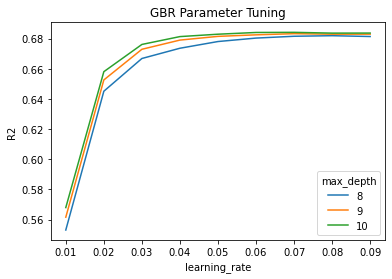

In [21]:
## Plotting Specifically Run #2 Data for GBR
mean_test_score = [0.55306966, 0.56157237, 0.56795282, 0.64511259, 0.65260273,
        0.65807665, 0.66682425, 0.6729304 , 0.67614038, 0.6736221 ,
        0.67903054, 0.68134769, 0.67807095, 0.68149319, 0.68293196,
        0.68035812, 0.68251492, 0.68407785, 0.68156629, 0.68328097,
        0.68416998, 0.68194178, 0.68293773, 0.68364785, 0.6814    ,
        0.68295745, 0.68368598]

for i in range(0, len(mean_test_score), 3):
    plt.plot([8, 9, 10], [mean_test_score[i], mean_test_score[i+1], mean_test_score[i+2]])

plt.title('GBR Parameter Tuning')
plt.xlabel('max_depth')
plt.ylabel('R2')
plt.legend([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09], title='learning_rate')
plt.show()

for i in range(0,3):
    plt.plot([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09],
             [mean_test_score[i], mean_test_score[i + 3], mean_test_score[i + 6], mean_test_score[i + 9], mean_test_score[i + 12], mean_test_score[i + 15], mean_test_score[i + 18], mean_test_score[i + 21], mean_test_score[i + 24]])

plt.title('GBR Parameter Tuning')
plt.xlabel('learning_rate')
plt.ylabel('R2')
plt.legend([8, 9, 10], title='max_depth')
plt.show()

#### Assessing Pairwise Ranking Accuracy

In [22]:
## Pairwise ranking accuracy with best GBR

rank_model = GradientBoostingRegressor(learning_rate=0.07, max_depth=10)
rank_model.fit(X_train, y_train)
pred = rank_model.predict(X_test)
rank_pred = stats.rankdata(pred, method='min')
rank_true = stats.rankdata(y_test, method='min')
true = 0
total = 0
for i in range(len(rank_pred)):
    for j in range(i+1, len(rank_pred)):
        if rank_pred[i] <= rank_pred[j] and rank_true[i] <= rank_true[j]:
            true += 1
            total += 1
        elif rank_pred[i] > rank_pred[j] and rank_true[i] > rank_true[j]:
            true += 1
            total += 1
        else:
            total += 1
prec = true / total
print("pairwise ranking accuracy: " + str(prec))

pairwise ranking accuracy: 0.8188434540115879


In [23]:
## Pairwise ranking accuracy with best RFR

rfr_rank_model = RandomForestRegressor()
rfr_rank_model.fit(X_train, y_train)
pred = rfr_rank_model.predict(X_test)
rank_pred = stats.rankdata(pred, method='min')
rank_true = stats.rankdata(y_test, method='min')
true = 0
total = 0
for i in range(len(rank_pred)):
    for j in range(i+1, len(rank_pred)):
        if rank_pred[i] <= rank_pred[j] and rank_true[i] <= rank_true[j]:
            true += 1
            total += 1
        elif rank_pred[i] > rank_pred[j] and rank_true[i] > rank_true[j]:
            true += 1
            total += 1
        else:
            total += 1
prec = true / total
print("pairwise ranking accuracy: " + str(prec))

pairwise ranking accuracy: 0.8182211982344754


#### Assessing Testing Data

In [24]:
rank_model.fit(X_train, y_train)
gbr_pred = rank_model.predict(X_test)
print('GBR score on test data: ' + str(r2_score(y_test, gbr_pred)))

rfr_rank_model.fit(X_train, y_train)
rfr_pred = rfr_rank_model.predict(X_test)
print('RFR score on test data: ' + str(r2_score(y_test, rfr_pred)))

GBR score on test data: 0.6875769428238143
RFR score on test data: 0.6829474942817115


#### Capturing Feature Importance

In [25]:
print(X_train.info)
feature_importance = rank_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure()
plt.barh(pos, feature_importance[sorted_idx])
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title('Feature Importance')

<bound method DataFrame.info of         acousticness  danceability  duration_ms  energy  explicit  \
93144         0.5530         0.415       276467   0.223         0   
53318         0.6270         0.373       190547   0.714         0   
76577         0.8640         0.240       156773   0.133         0   
113251        0.1430         0.588       261407   0.620         0   
61235         0.2740         0.651       237307   0.513         0   
...              ...           ...          ...     ...       ...   
100162        0.9640         0.223       206133   0.198         0   
18510         0.9230         0.444       215120   0.147         0   
14302         0.0104         0.518       117586   0.948         0   
94230         0.2150         0.647       344240   0.557         0   
132345        0.3080         0.412       198707   0.782         0   

        instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
93144           0.039600    5    0.0738   -18.533     0   

Text(0.5, 1.0, 'Feature Importance')

### Clustering

#### Import Packages

In [26]:
# pip install yellowbrick

In [27]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

#### Start with fresh dataframe(s)

In [28]:
df = pd.read_csv('cleaned_spotify.csv')
df['name'] = df['name'].astype('category').cat.codes
df['id'] = df['id'].astype('category').cat.codes
df['popularity'] = df['popularity'].astype(np.uint8)
df['id'] = df['id'].astype(np.uint8)
df['name'] = df['name'].astype(np.uint8)
df1 = df[['popularity', 'year']]

#### Sample Clustering

In [29]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df1)
visualizer.show()

kmeans = KMeans(n_clusters=visualizer.elbow_value_).fit(df1)
kmeans.labels_ 
sns.scatterplot(data=df1, x="popularity", y="year", hue=kmeans.labels_)
plt.show()

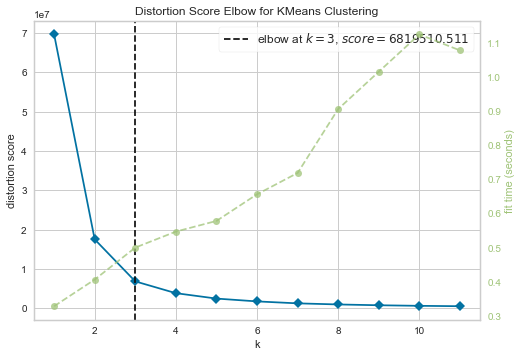

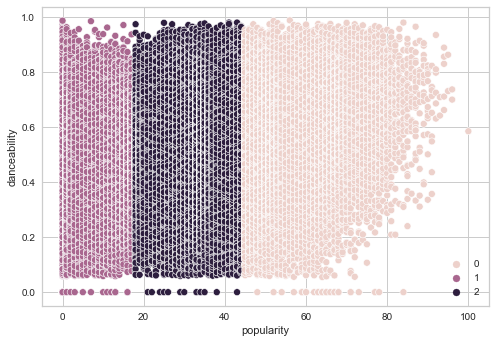

In [30]:
df3 = df[['popularity', 'danceability']]

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df3)
visualizer.show()

kmeans = KMeans(n_clusters=visualizer.elbow_value_).fit(df3)
kmeans.labels_ 
sns.scatterplot(data=df3, x="popularity", y="danceability", hue=kmeans.labels_)
plt.show()

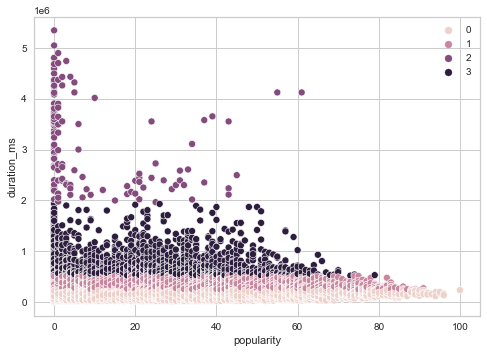

In [31]:
df4 = df[['popularity', 'duration_ms']]

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df4)
visualizer.show()

kmeans = KMeans(n_clusters=visualizer.elbow_value_).fit(df4)
kmeans.labels_ 
sns.scatterplot(data=df4, x="popularity", y="duration_ms", hue=kmeans.labels_)
plt.show()

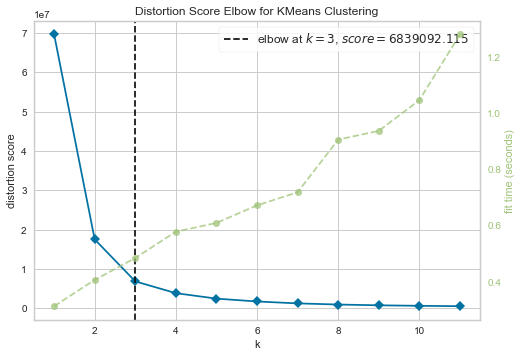

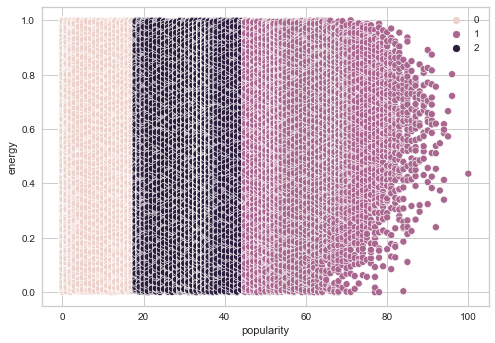

In [32]:
df5 = df[['popularity', 'energy']]

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df5)
visualizer.show()

kmeans = KMeans(n_clusters=visualizer.elbow_value_).fit(df5)
kmeans.labels_ 
sns.scatterplot(data=df5, x="popularity", y="energy", hue=kmeans.labels_)
plt.show()

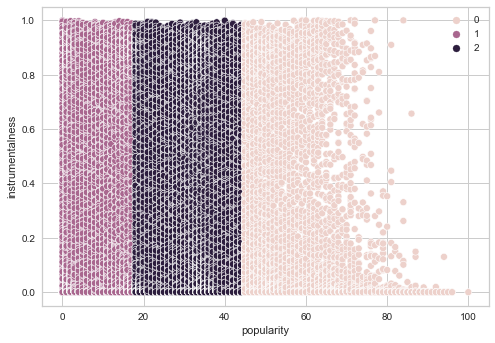

In [33]:
df6 = df[['popularity', 'instrumentalness']]

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df6)
visualizer.show()

kmeans = KMeans(n_clusters=visualizer.elbow_value_).fit(df6)
kmeans.labels_ 
sns.scatterplot(data=df6, x="popularity", y="instrumentalness", hue=kmeans.labels_)
plt.show()

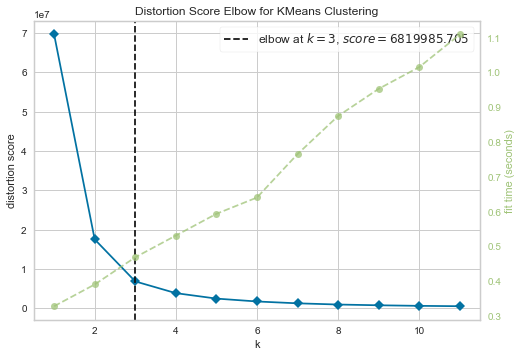

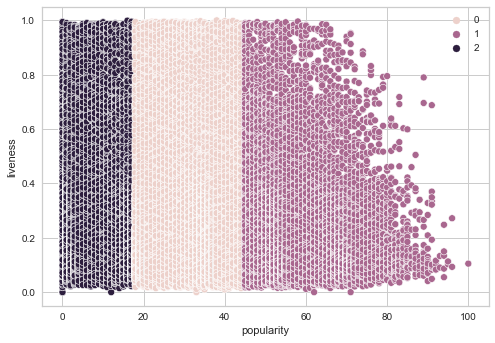

In [34]:
df7 = df[['popularity', 'liveness']]

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df7)
visualizer.show()

kmeans = KMeans(n_clusters=visualizer.elbow_value_).fit(df7)
kmeans.labels_ 
sns.scatterplot(data=df7, x="popularity", y="liveness", hue=kmeans.labels_)
plt.show()

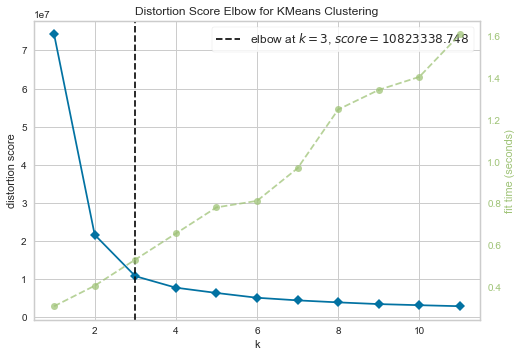

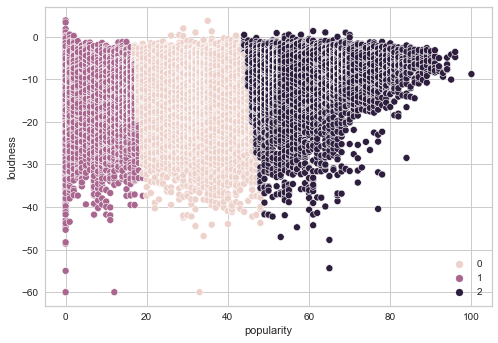

In [35]:
df8 = df[['popularity', 'loudness']]

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df8)
visualizer.show()

kmeans = KMeans(n_clusters=visualizer.elbow_value_).fit(df8)
kmeans.labels_ 
sns.scatterplot(data=df8, x="popularity", y="loudness", hue=kmeans.labels_)
plt.show()

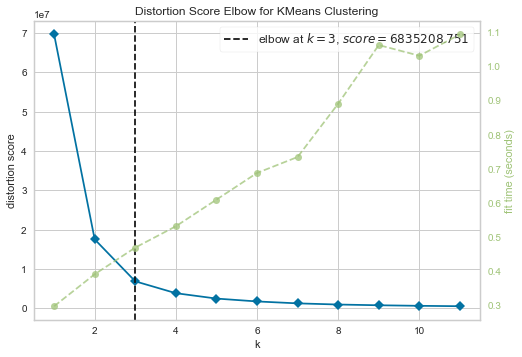

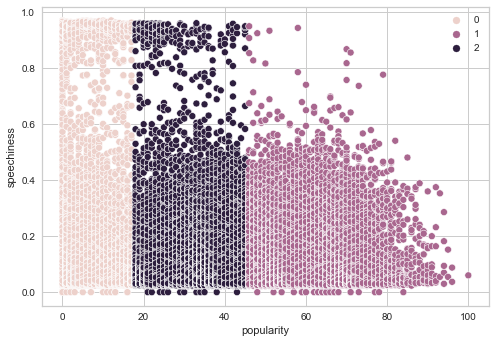

In [36]:
df9 = df[['popularity', 'speechiness']]

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df9)
visualizer.show()

kmeans = KMeans(n_clusters=visualizer.elbow_value_).fit(df9)
kmeans.labels_ 
sns.scatterplot(data=df9, x="popularity", y="speechiness", hue=kmeans.labels_)
plt.show()

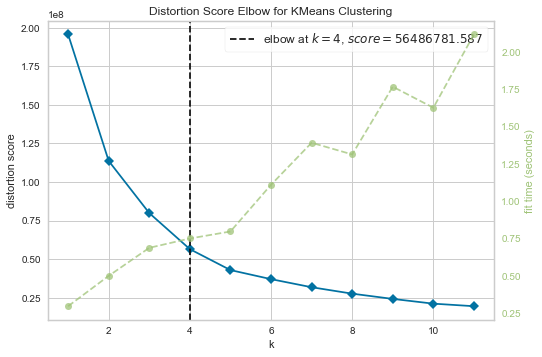

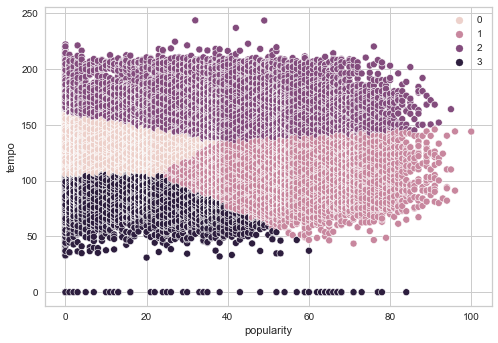

In [37]:
df10 = df[['popularity', 'tempo']]

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df10)
visualizer.show()

kmeans = KMeans(n_clusters=visualizer.elbow_value_).fit(df10)
kmeans.labels_ 
sns.scatterplot(data=df10, x="popularity", y="tempo", hue=kmeans.labels_)
plt.show()

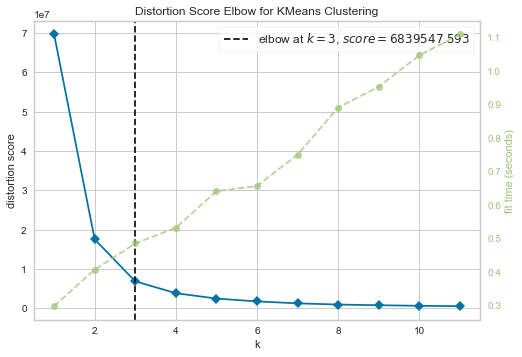

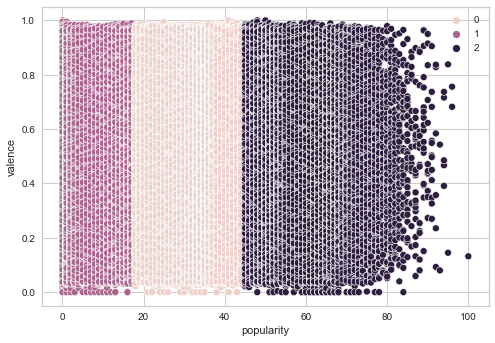

In [38]:
df11 = df[['popularity', 'valence']]

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df11)
visualizer.show()

kmeans = KMeans(n_clusters=visualizer.elbow_value_).fit(df11)
kmeans.labels_ 
sns.scatterplot(data=df11, x="popularity", y="valence", hue=kmeans.labels_)
plt.show()

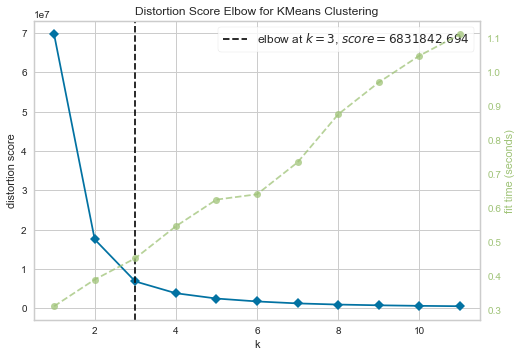

In [39]:
df12 = df[['popularity', 'acousticness']]

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df12)
visualizer.show()

kmeans = KMeans(n_clusters=visualizer.elbow_value_).fit(df12)
kmeans.labels_ 
sns.scatterplot(data=df12, x="popularity", y="acousticness", hue=kmeans.labels_)
plt.show()

#### 2-dimensional PCA Clustering

In [40]:
df2 = df.drop(columns=["name", "id", "artists","release_date","popularity"])
df2 = df2.dropna()
pca = PCA(2)
data = pca.fit_transform(df2)
df3 = pd.DataFrame(data, columns = ['C1','C2'])
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df3)
visualizer.show()

kmeans = KMeans(n_clusters=visualizer.elbow_value_).fit(df3)
kmeans.labels_ 
sns.scatterplot(data=df3, x="C1", y="C2", hue = kmeans.labels_)
plt.show()